In [1197]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

# Environment setup

### Library preparation

In [1198]:
%matplotlib notebook
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [1199]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pprint import pprint

In [1288]:
import sys 
sys.path.append('..\..\_jjtools')

# from Exps import *

from JJ_data_processing import read_opj_data, pbi, bpbi, show_df, update_df
from JJ_data_processing import xy_by_id,extract_Isw_R0_by_id

from JJformulas import *
from meas_util import *
from JJcalc import JJpar

from JJmeasurement import *

## New customized function in this experiment

WS: Please don't ask me why not use existing function, for some simple features it's actually faster to write one than making sure that I fully understand how to use the code... But yeah if we have time we should definitely go through our updated toolbox

In [1341]:
def shIV_by_id(runid):
    I,V = xy_by_id(runid)
    Vavg = (V[len(V)//4]+V[len(V)//4*3])/2
    IVdf = pd.DataFrame(data = {'I':I, 'V':V-Vavg})
    return(IVdf)

def jump_by_id(runid, V_thres=300e-6):
    IVdf = shIV_by_id(runid)
    IVdfjump = IVdf[np.abs(IVdf.diff().V) >= V_thres]

    return(IVdfjump)

# fig,ax = plt.subplots()

# r = 138
# I, V = xy_by_id(r)
# Vavg = (V[len(V)//4]+V[len(V)//4*3])/2
# ax.plot(I,V-Vavg,ls='-',marker='x')

# IVdfjump = jump_by_id(r, V_thres=200e-6)
# ax.plot(IVdfjump.I,IVdfjump.V,ls='none',marker='x')

# print(Blst)
# IVdfjump

# Sample discription

In [1202]:
jj = JJmeas(sample = 'D085N5')
jj.db_connect()

In [1203]:
# PIN ASSIGNMENT

# voltage leads:
# 3a                   3b

# current leads:
# 6b 6a 1a 5b 1b 4b 2a 2b
#   5  1  1  1  1  1  4   (number of SQUIDs in bewteen adjacent leads)
#   a  b  c  d  e  f  g   (dev label followed from Plamen's convention)

In [1392]:
ZF = -10e-6
FF = 215e-6

In [1389]:
swpdf.index = list(range(swpdf.shape[0]))
swpdf_backup = swpdf.copy(deep=True)
swpdf_backup

devid                                            swpdata  \
0   N5full  runid                              [18, 19, 20...   
1   N5full  runid                              [25, 26, 27...   
2   N5full  runid              [31, 32, 33, 34, 35, 36, 37...   
3   N5full  runid                   [44, 45, 46]
Bfield   ...   
4      N5a  runid                   [47, 48, 49]
Bfield   ...   
5      N5b  runid                   [50, 51, 52]
Bfield   ...   
6      N5c  runid                   [53, 54, 55]
Bfield   ...   
7      N5d  runid                   [56, 57, 58]
Bfield   ...   
8      N5e  runid                   [59, 60, 61]
Bfield   ...   
9      N5f  runid                   [62, 63, 64]
Bfield   ...   
10     N5g  runid                   [65, 66, 67]
Bfield   ...   
11     N5g  runid                  [68, 69, 70, 71, 72, 73...   
12     N5f  runid                  [77, 78, 79, 80, 81, 82...   
13     N5e  runid                  [86, 87, 88, 89, 90, 91...   
14     N5d  runid         [117, 118, 119, 120, 121, 122, 1...   
15     N5c  runid         [126, 127, 128, 129, 130, 131, 1...   
16     N5b  runid         [135, 136, 137, 138, 139, 140, 1...   
17     N5a  runid         [144, 145, 146, 147, 148, 149, 1...   
18     N5b  runid     [174, 175, 176, 177, 178, 179, 180, ...   
19     N5b  runid     [205, 206, 207, 208, 209, 210, 211, ...   
20     N5b  runid     [255, 256, 257, 258, 259, 260, 261, ...   
21     N5b  runid     [282, 283, 284, 285, 286, 287, 288, ...   
22     N5b  runid     [383, 384, 385, 386, 387, 388, 389, ...   

                             desc  
0             sanity check, B dep  
1   sanity check, search FF rough  
2    sanity check, search FF fine  
3                  init check_old  
4                  init check_old  
5                  init check_old  
6                  init check_old  
7                  init check_old  
8                  init check_old  
9                  init check_old  
10                 init check_old  
11                  FF detail_old  
12                  FF detail_old  
13                  FF detail_old  
14                  FF detail_old  
15                  FF detail_old  
16                  FF detail_old  
17                  FF detail_old  
18            B periodicity_rough  
19          B periodicity_near FF  
20                   B stochastic  
21         B periodicity_near -FF  
22          B periodicity_near ZF

In [1302]:
print('N5full')
display(JJpar(RN=16.525e3, sizeX=1.155e-6, sizeY=1.711e-6, metalTHK=250e-10, 
              T=20e-3, Nser=14, Npar=2, C_shunt=1e-20,
              ezread=True, EunHz=False, material = 'Al'))
print('N5a')
display(JJpar(RN=3.704e3, sizeX=1.155e-6, sizeY=1.711e-6, metalTHK=250e-10, 
              T=20e-3, Nser=4, Npar=2, C_shunt=1e-20,
              ezread=True, EunHz=False, material = 'Al'))
print('N5b')
display(JJpar(RN=1.296e3, sizeX=1.155e-6, sizeY=1.711e-6, metalTHK=250e-10, 
              T=20e-3, Nser=1, Npar=2, C_shunt=1e-20,
              ezread=True, EunHz=False, material = 'Al'))
print('N5e')
display(JJpar(RN=1.281e3, sizeX=1.155e-6, sizeY=1.711e-6, metalTHK=250e-10, 
              T=20e-3, Nser=1, Npar=2, C_shunt=1e-20,
              ezread=True, EunHz=False, material = 'Al'))
print('N5f')
display(JJpar(RN=1.299e3, sizeX=1.155e-6, sizeY=1.711e-6, metalTHK=250e-10, 
              T=20e-3, Nser=1, Npar=2, C_shunt=1e-20,
              ezread=True, EunHz=False, material = 'Al'))
print('N5g')
display(JJpar(RN=6.243e3, sizeX=1.155e-6, sizeY=1.711e-6, metalTHK=250e-10, 
              T=20e-3, Nser=5, Npar=2, C_shunt=1e-20,
              ezread=True, EunHz=False, material = 'Al'))

N5full


RN_JJ              Rs_JJ      I_AB     EJ   LK_JJ      C_JJ          Z  \
0  2.4 kohm  4.8 n$\Omega m^2$  135.5 nA  3.2 K  2.4 nH  102.4 fF  154.0 ohm   

   EC_tot       w_p      Q EJ/EC_to  
0  9.1 mK  10.1 GHz  15.3    355.8

N5a


RN_JJ              Rs_JJ      I_AB     EJ   LK_JJ      C_JJ          Z  \
0  1.9 kohm  3.8 n$\Omega m^2$  172.8 nA  4.1 K  1.9 nH  102.4 fF  136.4 ohm   

   EC_tot       w_p      Q EJ/EC_to  
0  9.1 mK  11.4 GHz  13.6    453.6

N5b


RN_JJ              Rs_JJ      I_AB     EJ   LK_JJ      C_JJ          Z  \
0  2.6 kohm  5.3 n$\Omega m^2$  123.4 nA  2.9 K  2.7 nH  102.4 fF  161.4 ohm   

   EC_tot      w_p      Q EJ/EC_to  
0  9.1 mK  9.6 GHz  16.1    324.1

N5e


RN_JJ              Rs_JJ      I_AB     EJ   LK_JJ      C_JJ          Z  \
0  2.6 kohm  5.2 n$\Omega m^2$  124.9 nA  3.0 K  2.6 nH  102.4 fF  160.4 ohm   

   EC_tot      w_p      Q EJ/EC_to  
0  9.1 mK  9.7 GHz  16.0    327.9

N5f


RN_JJ              Rs_JJ      I_AB     EJ   LK_JJ      C_JJ          Z  \
0  2.6 kohm  5.3 n$\Omega m^2$  123.2 nA  2.9 K  2.7 nH  102.4 fF  161.5 ohm   

   EC_tot      w_p      Q EJ/EC_to  
0  9.1 mK  9.6 GHz  16.1    323.3

N5g


RN_JJ              Rs_JJ      I_AB     EJ   LK_JJ      C_JJ          Z  \
0  2.5 kohm  5.1 n$\Omega m^2$  128.1 nA  3.1 K  2.6 nH  102.4 fF  158.4 ohm   

   EC_tot      w_p      Q EJ/EC_to  
0  9.1 mK  9.8 GHz  15.8    336.4

# Meas

## Full IVc sanity check among devices

Isrc range is 1e-4

<IPython.core.display.Javascript object>


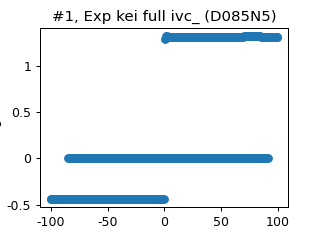

In [1207]:
# jj.pbi(1)

<IPython.core.display.Javascript object>


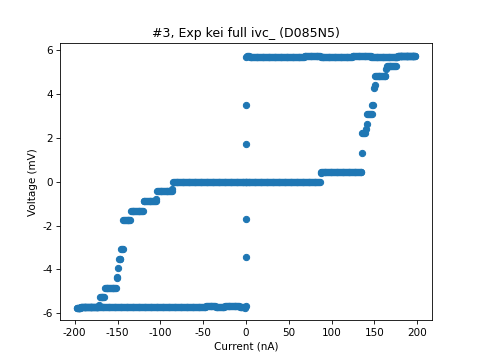

In [1507]:
jj.pbi(3)

some measurements??

<IPython.core.display.Javascript object>


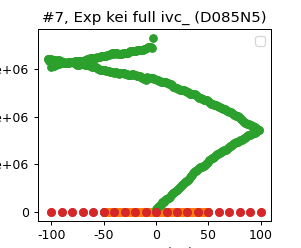

No handles with labels found to put in legend.


In [1209]:
jj.bpbi(range(4, 7+1))

<IPython.core.display.Javascript object>


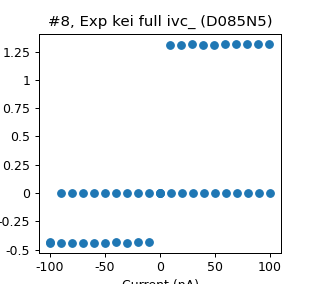

In [1210]:
jj.pbi(8)

WS: qucik run after the meeting shows no response from the device.

<IPython.core.display.Javascript object>


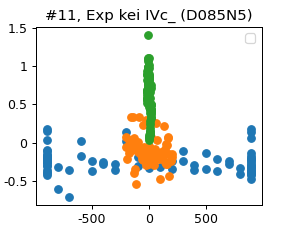

No handles with labels found to put in legend.


In [1211]:
jj.bpbi(range(9,12))

WS: Ummm... no response from the device (V_sense = 0)
Is the device shunted now?
Why the I_bias range is set to 2E-4 ?? Was this done remotely? did we have shunt protection before switching the range?
Or some kinds of device reset was performed? (But a reset device shouldn't have an enabled output)

KK: Please everyone, leave some comments on your measurements, what happened btween runs 3 - 8?

WS: OK so it's just the device was shunted after run 8. Two probes results on pin 2b6b and 3ab still shows R a bit higher than 200kohm. DUT is still healthy.

The connection was a bit confusing given so many unrelated wiring inside the panel box. I removed unrelated/disconnected wiring. Also since we have effectivly 10kohm with 10Mohm+R_DUT in parallel, I guess we would be using 1E-3 as the current dividing factor. That explained the range of KEI was set to 2e-4 such that the I_bias was capped at 0.2uA.

PK: Runs 3-8 were just test IVC on the full sample with different step sizes. I shunted the sample before I left for the day.

<IPython.core.display.Javascript object>


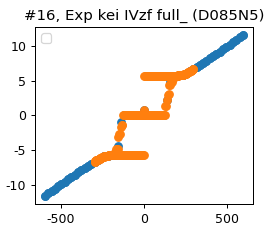

No handles with labels found to put in legend.


In [1212]:
#jj.bpbi([12,13,14]) sanity check
jj.bpbi([15,16])

> WS: In runid 16, I set I_stp to be 5nA and I'm expecting 5uA I_bias coming out from KEI. But what I'm seeing from KEI screen is 1.1uA which is much smaller. How was the current dividor factor claculated?

WS: Let's qucikly check the B-field dep.

In [ ]:
# nstart = 18
# devid = 'N5full'
# Blst = np.linspace(  0,2,6)*1e-4

# sweep = {'runid' : np.arange(nstart,nstart+len(Blst),1),
#          'Bfield': Blst,
#          'T': [63e-3]*len(Blst)}
# swpdt = pd.Series(data = sweep)

# swpdf = {'devid'  : devid,
#          'swpdata': [swpdt],
#          'desc'   : 'sanity check, B dep'}
# swpdf = pd.DataFrame(data = swpdf)

<IPython.core.display.Javascript object>


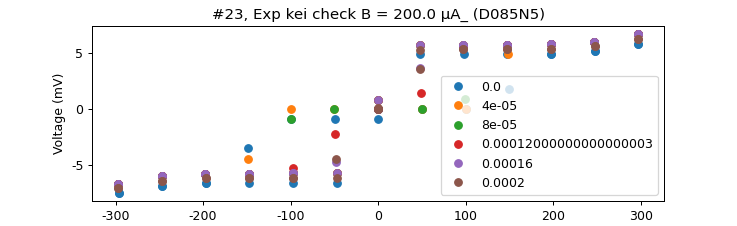

In [1213]:
jj.bpbi(range(18,24), labels = np.linspace(  0,2,6)*1e-4)

<IPython.core.display.Javascript object>


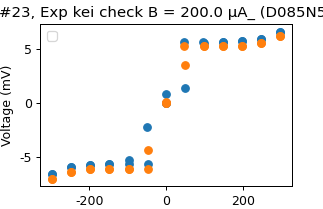

No handles with labels found to put in legend.


In [1214]:
jj.bpbi([21,23])

WS: OK first thing is FF is still around 160uA (iirc 178uA?). Next, we can still see that the gap plateau be lifted by B-field. Let's run more careful scan around the FF point.

<IPython.core.display.Javascript object>


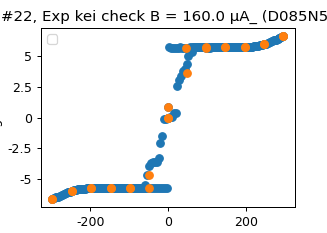

No handles with labels found to put in legend.


In [1215]:
# I accidentally set B to 1.5mA at id24, 
# so let's qucikly check if the frutstration was screwed up.
jj.bpbi([26,22])

In [ ]:
# nstart = 25
# devid = 'N5full'
# Blst = np.linspace(1.5,2,6)*1e-4

# sweep = {'runid' : np.arange(nstart,nstart+len(Blst),1),
#          'Bfield': Blst,
#          'T': [63e-3]*len(Blst)}
# swpdt = pd.Series(data = sweep)

# swpd0 = {'devid'  : devid,
#          'swpdata': [swpdt],
#          'desc'   : 'sanity check, search FF rough'}
# swpd0 = pd.DataFrame(data = swpd0)
# swpdf = swpdf.append(swpd0)

<IPython.core.display.Javascript object>


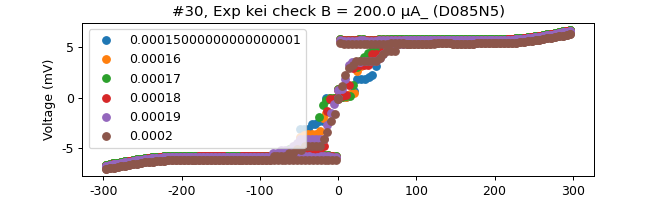

In [1216]:
jj.bpbi(range(25,31), labels = (np.linspace(1.5,2,6)*1e-4))

WS: everyting looks alright but the field is a bit shifted. Let me be a little bit picky here and double check finer scan before we move on.

In [ ]:
# nstart = 31
# devid = 'N5full'
# Blst = np.linspace(1.7,2.1,10)*1e-4

# sweep = {'runid' : np.arange(nstart,nstart+len(Blst),1),
#          'Bfield': Blst,
#          'T': [63e-3]*len(Blst)}
# swpdt = pd.Series(data = sweep)

# swpd0 = {'devid'  : devid,
#          'swpdata': [swpdt],
#          'desc'   : 'sanity check, search FF fine'}
# swpd0 = pd.DataFrame(data = swpd0)
# swpdf = swpdf.append(swpd0)

<IPython.core.display.Javascript object>


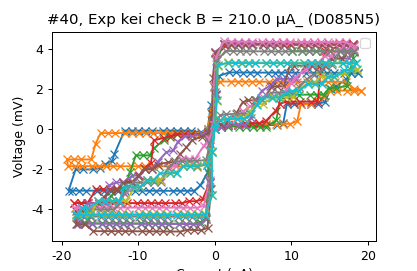

No handles with labels found to put in legend.


In [1217]:
jj.bpbi(range(31,41),marker = 'x', ls='-')#, labels = (np.linspace(1.7,2.1,10)*1e-4))

WS: ok, so everything looks fine except that the FF shited a bit. We have FF point around 1.9e-4. Now let's setup the measuremnt protocol and go through dev by dev in N5.

segName = '5full'
jj.IVC_udu (amp = 0.6e-6, stp = 20e-9, dt = .1,  N_avg = 1, 
            label = 'kei IVcZF, {}'.format(segName))

Blst = [0,1.9e-4]
jj.IVC_udu (amp = 0.3e-6, stp = 5e-9, dt = .1,  N_avg = 1, 
            label = 'kei IVf B:{}A, {}'.format(si_format(B)),segName)

WS: N5c and N5d acts funny. Also it seems that they all have different frustration point?!

> it turns out that I used incorrect pin 5a instead of 5b. will redo the meas and update rund id accordingly

In [ ]:
# dic = {'full':44,'a':47,'b':50,'c':53,'d':56,'e':59,'f':62,'g':65}
# for i in dic:
#     nstart = dic[i]
#     devid = 'N5'+i
#     Blst = [0,0,FF]

#     sweep = {'runid' : np.arange(nstart,nstart+len(Blst),1),
#              'Bfield': Blst,
#              'T': [63e-3]*len(Blst),
#              'labels': ['coarse','fine_ZF','fine_FF']}
#     swpdt = pd.Series(data = sweep)

#     swpd0 = {'devid'  : devid,
#              'swpdata': [swpdt],
#              'desc'   : 'init check_old'}
#     swpd0 = pd.DataFrame(data = swpd0)
#     swpdf = swpdf.append(swpd0)

<IPython.core.display.Javascript object>


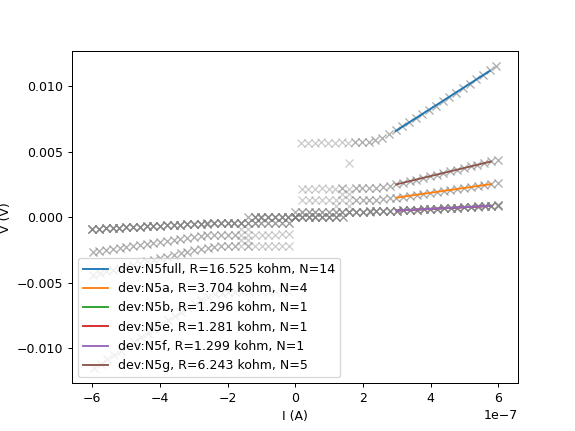

Text(0, 0.5, 'V (V)')

In [1300]:
N = [14,4,1,1,1,5]
fig,ax = plt.subplots()
dt = swpdf[swpdf.desc=='init check_old']
dt = dt.append(dt.iloc[0:3]).append(dt.iloc[5:]).copy(deep=True)[8:]
for i in range(dt.shape[0]):
    I,V = xy_by_id(dt.iloc[i].swpdata.runid[0])
    ax.plot(I,V,ls='none',marker='x',color='grey',alpha=0.4)
    l=len(V)
    a, b = np.polyfit(I[l//8:l//4],V[l//8:l//4],1)

    label = 'dev:{}, R={}ohm, N={}'.format(dt.iloc[i].devid, si_format(a,3), N[i])
    ax.plot(I[l//8:l//4], a*I[l//8:l//4]+b, label = label)
ax.legend(loc=3)
ax.set_xlabel('I (A)')
ax.set_ylabel('V (V)')

<IPython.core.display.Javascript object>


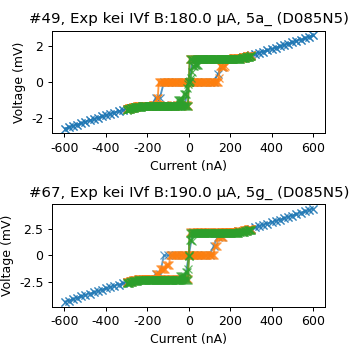

In [1218]:
a = swpdf[swpdf.desc=='init check_old']

fig,ax = plt.subplots(2,1,figsize=(4,4))
ax=ax.flatten()
devlst = 'ag'
for i,v in enumerate(devlst):
    runidlst = a[a.devid=='N5'+v].swpdata.iloc[0].runid
    for r,w in enumerate(runidlst):
        jj.pbi(w, axes = ax[i], marker = 'x', ls = '-',
               color = 'C'+str(r), alpha = 0.8-0.1*i)
plt.tight_layout()

<IPython.core.display.Javascript object>


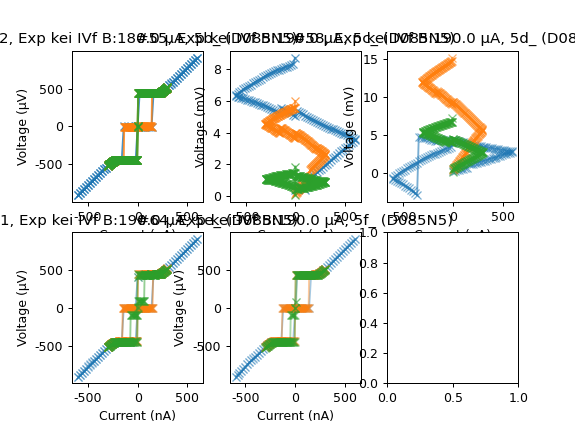

In [1219]:
a = swpdf[swpdf.desc=='init check_old']

fig,ax = plt.subplots(2,3)
ax=ax.flatten()
devlst = 'bcdef'
for i,v in enumerate(devlst):
    runidlst = a[a.devid=='N5'+v].swpdata.iloc[0].runid
    for r,w in enumerate(runidlst):
        jj.pbi(w, axes = ax[i], marker = 'x', ls = '-',
               color = 'C'+str(r), alpha = 0.8-0.1*i)

WS: ... So it's not that they have different frustration point but it's more like the "subgap" response

**Is it possible that only some of the sites suffere from the subgap response?**
> No it's just taht I used the wrong pin.

In [ ]:
# dic = {'full':177,'g':68,'f':77,'e':86,'d':117,'c':126, 'b':135, 'a':144}
# for i in dic:
#     nstart = dic[i]
#     devid = 'N5'+i
#     Blst = np.linspace(1.7,2.1,9)*1e-4

#     sweep = {'runid' : np.arange(nstart,nstart+len(Blst),1),
#              'Bfield': Blst,
#              'T': [63e-3]*len(Blst)}
#     swpdt = pd.Series(data = sweep)

#     swpd0 = {'devid'  : devid,
#              'swpdata': [swpdt],
#              'desc'   : 'FF detail_old'}
#     swpd0 = pd.DataFrame(data = swpd0)
#     swpdf = swpdf.append(swpd0)

<IPython.core.display.Javascript object>


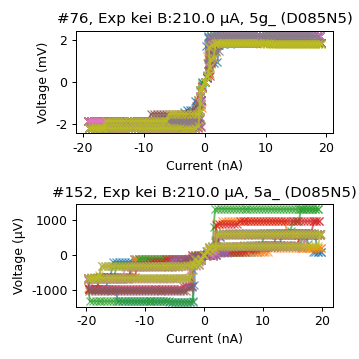

In [1220]:
a = swpdf[swpdf.desc=='FF detail_old']

fig,ax = plt.subplots(2,1,figsize=(4,4))
ax=ax.flatten()
devlst = 'ga'
for i,v in enumerate(devlst):
    runidlst = a[a.devid=='N5'+v].swpdata.iloc[0].runid
    for r,w in enumerate(runidlst):
        jj.pbi(w, axes = ax[i], marker = 'x', ls = '-',
               color = 'C'+str(r), alpha = 0.8-0.1*i)
plt.tight_layout()

<IPython.core.display.Javascript object>


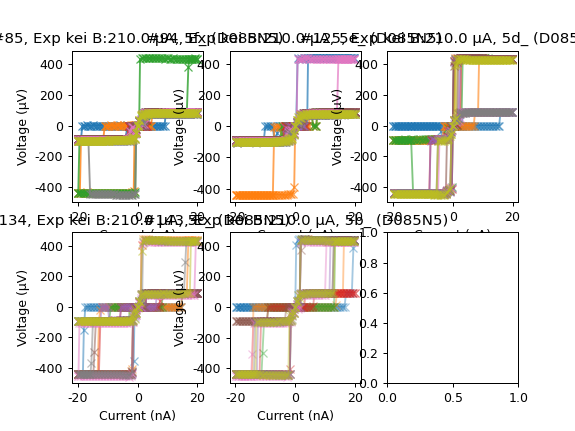

In [1221]:
a = swpdf[swpdf.desc=='FF detail_old']

fig,ax = plt.subplots(2,3)
ax=ax.flatten()
devlst = 'fedcb'
for i,v in enumerate(devlst):
    runidlst = a[a.devid=='N5'+v].swpdata.iloc[0].runid
    for r,w in enumerate(runidlst):
        jj.pbi(w, axes = ax[i], marker = 'x', ls = '-',
               color = 'C'+str(r), alpha = 0.8-0.1*i)

WS: Uhhhhhhh!!! I just realized that the IV leads were swapped... Should've double checked the arrangement... Redo all measurement with swapped IV lead (which is following the definition in pin assignment from now on)

runid in range(152,168) are craps. Continue on runid 168

In [ ]:
dic = {'full':,'a':168,'b':171,'c':,'d':,'e':,'f':,'g':}
for i in dic:
    nstart = dic[i]
    devid = 'N5'+i
    Blst = [ZF,ZF,FF]

    sweep = {'runid' : np.arange(nstart,nstart+len(Blst),1),
             'Bfield': Blst,
             'T': [63e-3]*len(Blst),
             'labels': ['coarse','fine_ZF','fine_FF']}
    swpdt = pd.Series(data = sweep)

    swpd0 = {'devid'  : devid,
             'swpdata': [swpdt],
             'desc'   : 'init check'}
    swpd0 = pd.DataFrame(data = swpd0)
    swpdf = swpdf.append(swpd0)

WS: Let's do some stochastic and periodicity sweep on N5b tonight.

## Closer look on N5b

In [ ]:
# dic = {'b':174}
# for i in dic:
#     nstart = dic[i]
#     devid = 'N5'+i
#     Blst = np.linspace(-3,3,31)*FF

#     sweep = {'runid' : np.arange(nstart,nstart+len(Blst),1),
#              'Bfield': Blst,
#              'T': [63e-3]*len(Blst)}
#     swpdt = pd.Series(data = sweep)

#     swpd0 = {'devid'  : devid,
#              'swpdata': [swpdt],
#              'desc'   : 'B periodicity_rough'}
#     swpd0 = pd.DataFrame(data = swpd0)
#     swpdf = swpdf.append(swpd0)

<IPython.core.display.Javascript object>


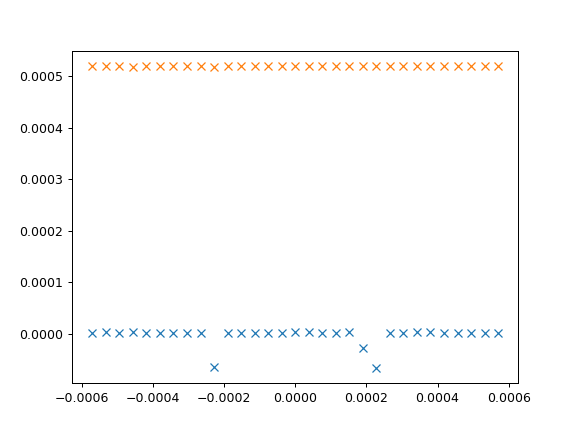

<IPython.core.display.Javascript object>


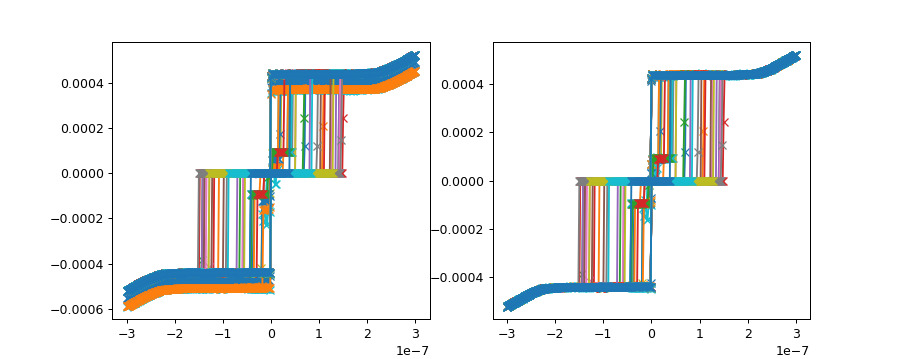

In [1224]:
fig,ax = plt.subplots()

Blst = np.linspace(-3,3,31)*FF
runidlst = list(range(174,205))

Vavglst = []
VgapPlst = []
VgapNlst = []
for i in range(len(runidlst)):
    I, V = xy_by_id(runidlst[i])
    Vavg = (V[len(V)//4]+V[len(V)//4*3])/2
    Vavglst += [Vavg]
    VgapPlst += [V[len(V)//4] - Vavg]
    
ax.plot(Blst, Vavglst, ls='none', marker='x')
ax.plot(Blst, VgapPlst, ls='none', marker='x')

fig,ax = plt.subplots(1,2,figsize=(10,4))
# runidlst = [188]
for i in runidlst:
        I, V = xy_by_id(i)
        Vavg = (V[len(V)//4]+V[3*len(V)//4])/2
        ax[0].plot(I,V-V[0],ls='-',marker='x')
        ax[1].plot(I,V-Vavg,ls='-',marker='x')

<IPython.core.display.Javascript object>


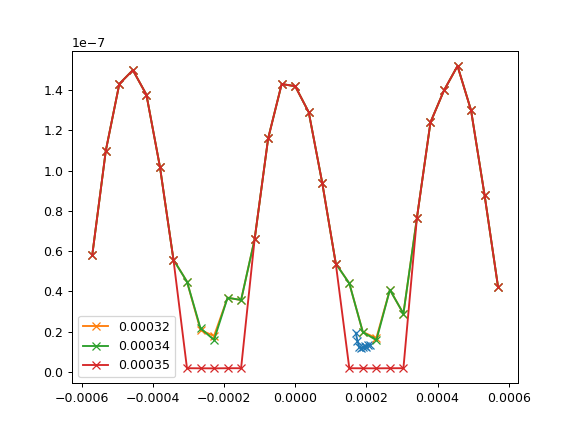

In [1225]:
fig,ax = plt.subplots()

Blst = swpdf[swpdf.devid=='N5b'].iloc[1].swpdata.Bfield
runidlst = swpdf[swpdf.devid=='N5b'].iloc[1].swpdata.runid

I_SWlst  = []
for r in range(len(runidlst)):
    IVdfjump = jump_by_id(runidlst[r], V_thres=200e-6)
    if IVdfjump.shape[0]==4:
        I_SWlst += [(IVdfjump.iloc[0].I-IVdfjump.iloc[2].I)/2]
    else:
        I_SWlst += [np.abs(IVdfjump.I).max()]
    
ax.plot(Blst,I_SWlst,ls='-',marker='x')

###########################################################
Blst = np.linspace(-3,3,31)*FF
runidlst = list(range(174,205))

V_threslst = [320e-6, 340e-6, 350e-6]
for V_thres in V_threslst:
    I_SWlst  = []
    for r in range(len(runidlst)):
        IVdfjump = jump_by_id(runidlst[r], V_thres=V_thres)
        if IVdfjump.shape[0]==4:
            I_SWlst += [(IVdfjump.iloc[0].I-IVdfjump.iloc[2].I)/2]
        else:
            I_SWlst += [np.abs(IVdfjump.I).max()]
            
    ax.plot(Blst,I_SWlst,ls='-',marker='x',label = V_thres)
ax.legend()

WS: V_gap is fairly symmetric when aligned with len(V)//4 except around the FF point (the shift of IVc is related to SQUID frustration, why?), the same case for V_subgap.
Noise level is in general 3uV. V_gap fluctuates at a level around 6uV. (because of T8 fluctuation?)

In terms of field response, a. periodicity and b. close to ZF seems to be alright. But there is some odd features close to FF which is related to selection of V_thres (<350uV). This number indicates that these jumps are no-so-correctly-interpreted since the subgap state is messing around here.

**Does this mean that the subgap is somehow related to SQUID?**

let's do fine-scan across FF for overnight.

In [1226]:
# dic = {'b':205}
# for i in dic:
#     nstart = dic[i]
#     devid = 'N5'+i
#     Blst = Blst = np.arange(100e-6,350e-6,5e-6)

#     sweep = {'runid' : np.arange(nstart,nstart+len(Blst),1),
#              'Bfield': Blst,
#              'T': [63e-3]*len(Blst)}
#     swpdt = pd.Series(data = sweep)

#     swpd0 = {'devid'  : devid,
#              'swpdata': [swpdt],
#              'desc'   : 'B periodicity_near FF'}
#     swpd0 = pd.DataFrame(data = swpd0)
#     swpdf = swpdf.append(swpd0)

<IPython.core.display.Javascript object>


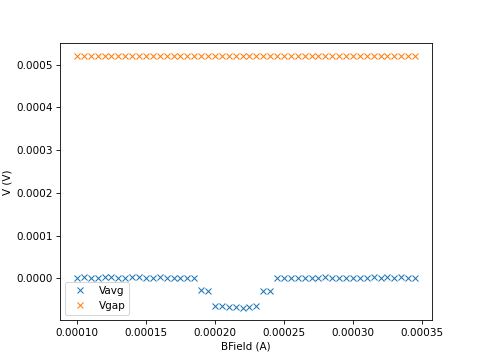

<IPython.core.display.Javascript object>


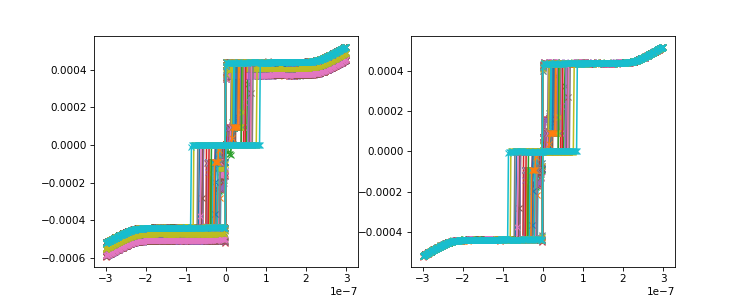

In [1411]:
# 15:32
fig,ax = plt.subplots()

Blst = swpdf[swpdf.devid=='N5b'].iloc[3].swpdata.Bfield
runidlst = swpdf[swpdf.devid=='N5b'].iloc[3].swpdata.runid
# Blst = Blst[len(Blst)//2-10:len(Blst)//2+7]
# runidlst = runidlst[len(runidlst)//2-10:len(runidlst)//2+7]

Vavglst = []
VgapPlst = []
VgapNlst = []
for i in range(len(runidlst)):
    I, V = xy_by_id(runidlst[i])
    Vavg = (V[len(V)//4]+V[len(V)//4*3])/2
    Vavglst += [Vavg]
    VgapPlst += [V[len(V)//4] - Vavg]
    
ax.plot(Blst, Vavglst, ls='none', marker='x',label = 'Vavg')
ax.plot(Blst, VgapPlst, ls='none', marker='x',label = 'Vgap')
ax.set_xlabel('BField (A)')
ax.set_ylabel('V (V)')
ax.legend()

fig,ax = plt.subplots(1,2,figsize=(10,4))
# runidlst = [188]
for i in runidlst:
        I, V = xy_by_id(i)
        Vavg = (V[len(V)//4]+V[3*len(V)//4])/2
        ax[0].plot(I,(V),ls='-',marker='x')
        ax[1].plot(I,(V-Vavg),ls='-',marker='x')

# [len(V-Vavg)//4:3*len(V-Vavg)//4]
# [len(V-Vavg)//4:3*len(V-Vavg)//4]

<IPython.core.display.Javascript object>


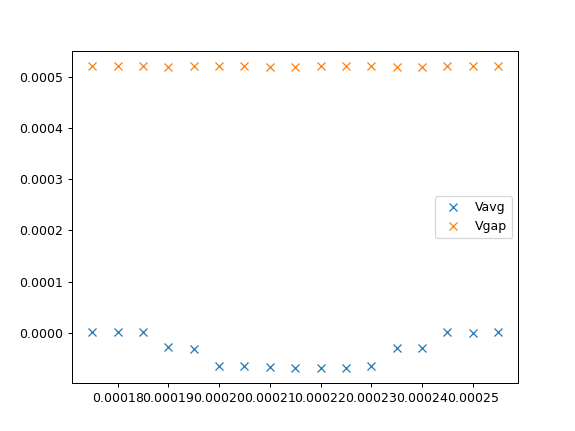

<IPython.core.display.Javascript object>


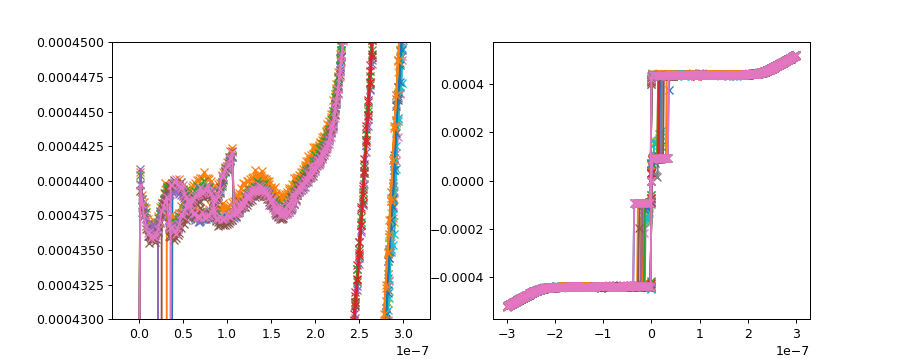

(0.00043, 0.00045)

In [1240]:
# 15:32
fig,ax = plt.subplots()

Blst = swpdf[swpdf.devid=='N5b'].iloc[3].swpdata.Bfield
runidlst = swpdf[swpdf.devid=='N5b'].iloc[3].swpdata.runid
Blst = Blst[len(Blst)//2-10:len(Blst)//2+7]
runidlst = runidlst[len(runidlst)//2-10:len(runidlst)//2+7]

Vavglst = []
VgapPlst = []
VgapNlst = []
for i in range(len(runidlst)):
    I, V = xy_by_id(runidlst[i])
    Vavg = (V[len(V)//4]+V[len(V)//4*3])/2
    Vavglst += [Vavg]
    VgapPlst += [V[len(V)//4] - Vavg]
    
ax.plot(Blst, Vavglst, ls='none', marker='x',label = 'Vavg')
ax.plot(Blst, VgapPlst, ls='none', marker='x',label = 'Vgap')
ax.legend()

fig,ax = plt.subplots(1,2,figsize=(10,4))
# runidlst = [188]
for i in runidlst:
        I, V = xy_by_id(i)
        Vavg = (V[len(V)//4]+V[3*len(V)//4])/2
        ax[0].plot(I,(V-V[0]),ls='-',marker='x')
        ax[1].plot(I,(V-Vavg),ls='-',marker='x')
ax[0].set_xlim(0-I.max()*0.1,I.max()*1.1)
ax[0].set_ylim(430e-6,450e-6)

# [len(V-Vavg)//4:3*len(V-Vavg)//4]
# [len(V-Vavg)//4:3*len(V-Vavg)//4]

<IPython.core.display.Javascript object>


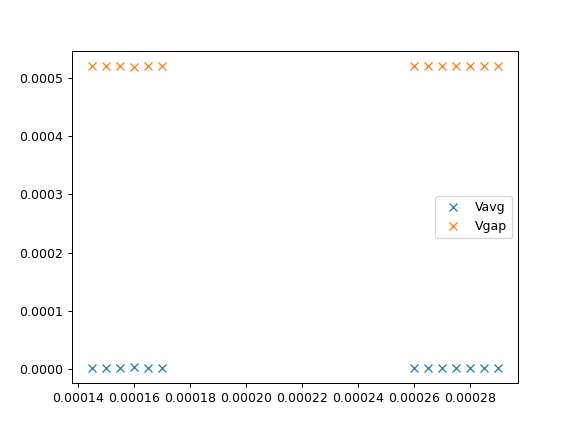

<IPython.core.display.Javascript object>


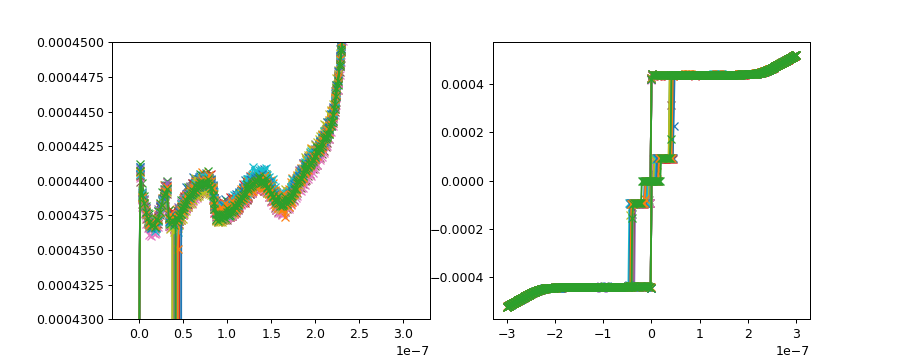

(0.00043, 0.00045)

In [1228]:
# 9:15 + 32:39
fig,ax = plt.subplots()

Blst = swpdf[swpdf.devid=='N5b'].iloc[3].swpdata.Bfield
runidlst = swpdf[swpdf.devid=='N5b'].iloc[3].swpdata.runid

Blst1 = Blst[ 9:15]
Blst2 = Blst[32:39]
Blst  = np.append(Blst1, Blst2)
runidlst1 = runidlst[ 9:15]
runidlst2 = runidlst[32:39]
runidlst  = np.append(runidlst1, runidlst2)

Vavglst = []
VgapPlst = []
VgapNlst = []
for i in range(len(runidlst)):
    I, V = xy_by_id(runidlst[i])
    Vavg = (V[len(V)//4]+V[len(V)//4*3])/2
    Vavglst += [Vavg]
    VgapPlst += [V[len(V)//4] - Vavg]
    
ax.plot(Blst, Vavglst, ls='none', marker='x',label = 'Vavg')
ax.plot(Blst, VgapPlst, ls='none', marker='x',label = 'Vgap')
ax.legend()

fig,ax = plt.subplots(1,2,figsize=(10,4))
# runidlst = [188]
for i in runidlst:
        I, V = xy_by_id(i)
        Vavg = (V[len(V)//4]+V[3*len(V)//4])/2
        ax[0].plot(I,(V-V[0]),ls='-',marker='x')
        ax[1].plot(I,(V-Vavg),ls='-',marker='x')
ax[0].set_xlim(0-I.max()*0.1,I.max()*1.1)
ax[0].set_ylim(430e-6,450e-6)

<IPython.core.display.Javascript object>


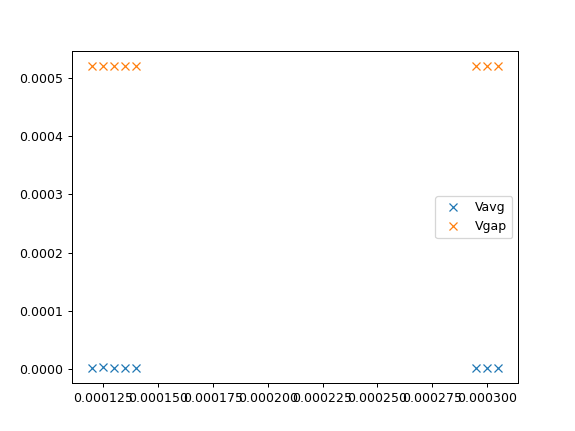

<IPython.core.display.Javascript object>


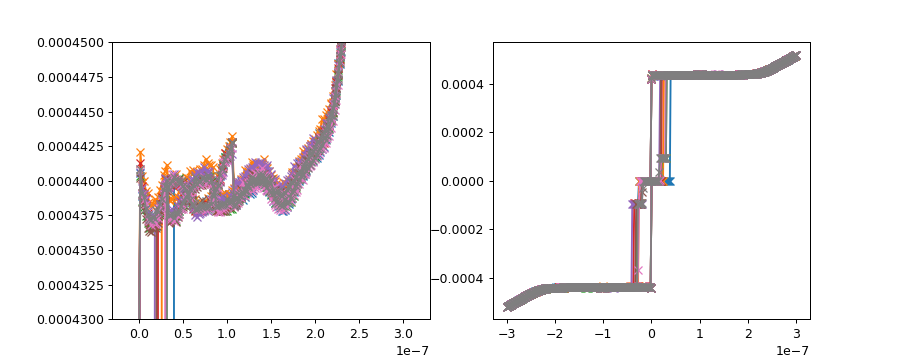

(0.00043, 0.00045)

In [1229]:
# 4:9 + 39:42
fig,ax = plt.subplots()

Blst = swpdf[swpdf.devid=='N5b'].iloc[3].swpdata.Bfield
runidlst = swpdf[swpdf.devid=='N5b'].iloc[3].swpdata.runid

Blst1 = Blst[ 4: 9]
Blst2 = Blst[39:42]
Blst  = np.append(Blst1, Blst2)
runidlst1 = runidlst[ 4: 9]
runidlst2 = runidlst[39:42]
runidlst  = np.append(runidlst1, runidlst2)

Vavglst = []
VgapPlst = []
VgapNlst = []
for i in range(len(runidlst)):
    I, V = xy_by_id(runidlst[i])
    Vavg = (V[len(V)//4]+V[len(V)//4*3])/2
    Vavglst += [Vavg]
    VgapPlst += [V[len(V)//4] - Vavg]
    
ax.plot(Blst, Vavglst, ls='none', marker='x',label = 'Vavg')
ax.plot(Blst, VgapPlst, ls='none', marker='x',label = 'Vgap')
ax.legend()

fig,ax = plt.subplots(1,2,figsize=(10,4))
# runidlst = [188]
for i in runidlst:
        I, V = xy_by_id(i)
        Vavg = (V[len(V)//4]+V[3*len(V)//4])/2
        ax[0].plot(I,(V-V[0]),ls='-',marker='x')
        ax[1].plot(I,(V-Vavg),ls='-',marker='x')
ax[0].set_xlim(0-I.max()*0.1,I.max()*1.1)
ax[0].set_ylim(430e-6,450e-6)

<IPython.core.display.Javascript object>


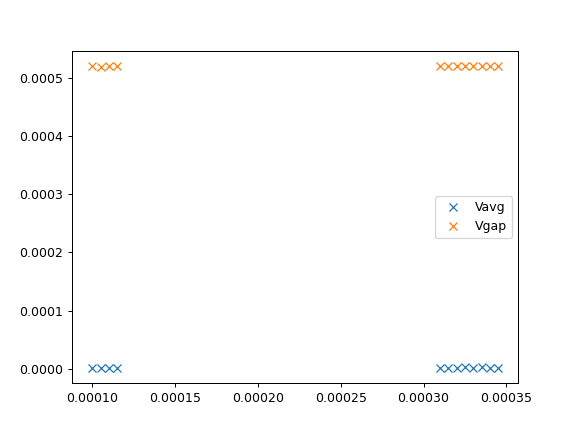

<IPython.core.display.Javascript object>


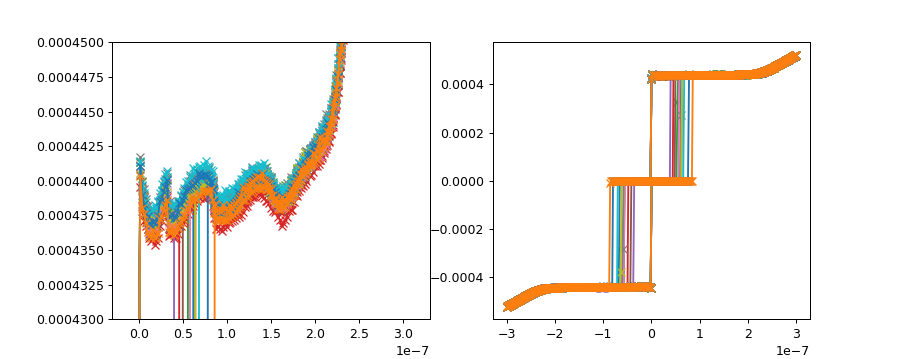

(0.00043, 0.00045)

In [1230]:
# :4 + 42:
fig,ax = plt.subplots()

Blst = swpdf[swpdf.devid=='N5b'].iloc[3].swpdata.Bfield
runidlst = swpdf[swpdf.devid=='N5b'].iloc[3].swpdata.runid

Blst1 = Blst[: 4]
Blst2 = Blst[42:]
Blst  = np.append(Blst1, Blst2)
runidlst1 = runidlst[: 4]
runidlst2 = runidlst[42:]
runidlst  = np.append(runidlst1, runidlst2)

Vavglst = []
VgapPlst = []
VgapNlst = []
for i in range(len(runidlst)):
    I, V = xy_by_id(runidlst[i])
    Vavg = (V[len(V)//4]+V[len(V)//4*3])/2
    Vavglst += [Vavg]
    VgapPlst += [V[len(V)//4] - Vavg]
    
ax.plot(Blst, Vavglst, ls='none', marker='x',label = 'Vavg')
ax.plot(Blst, VgapPlst, ls='none', marker='x',label = 'Vgap')
ax.legend()

fig,ax = plt.subplots(1,2,figsize=(10,4))
# runidlst = [188]
for i in runidlst:
        I, V = xy_by_id(i)
        Vavg = (V[len(V)//4]+V[3*len(V)//4])/2
        ax[0].plot(I,(V-V[0]),ls='-',marker='x')
        ax[1].plot(I,(V-Vavg),ls='-',marker='x')
ax[0].set_xlim(0-I.max()*0.1,I.max()*1.1)
ax[0].set_ylim(430e-6,450e-6)

> WS: ok so my point here was to verify the correlation between some fine features in V_gap and the switching current when entering the subgap regime. And hope we can find/be inspired from any hints.

> All IVc on LHS above in each cell is IVc shifted against V[0] accordingly, while on RHS is shifted against (V.max+V.min)/2. Nothing really different except for points near FF. ([15:32], the first cell above)

> Also, if we carefully look through we are seeing groups of data sets (as have been sepereted in each cell above) when we go across FF. There are total 4 sets of data and let's mark them (from close to FF to far away from FF) as ABCD. Data set D shows standard IVc where I_SW far away from subgap I_SW, we have repeatable plateau although some wiggling feature. 

> **Misha commented that the overheating will be main concern given that 0.1nW is already enumours.**

> Next, dataset B shows consistent result with D. Later on we will see a bit more similarities in these two set of data. Also, if we look at returning loop of IVs Dataset C and A they are having similar and repeatable wiggling during the 6hrs scan as well.

> What is bothering me is the forward scan of dataset C and A: around 100nA we are seeing another jump in V_gap state. This jump modified the inner structure of the pleatau and makes the wiggling has different "periodicity". The reason I say "structure" is because considering we ramping up the current and getting closer to but less then 100nA, if the inner structure of the gap remained the same we are expecting similar pleatau feature untill we hit the jump around 100nA. However this is not the case since the entire pleatau strucure is different once the junction switched to Vgap. It's easier to see what I meant by taking screenshots and comparing pictures side-by-side in powerpoint.

> Next measurement shows the periodicity of I_SW and we also see some weird features around FF as usual.

<IPython.core.display.Javascript object>


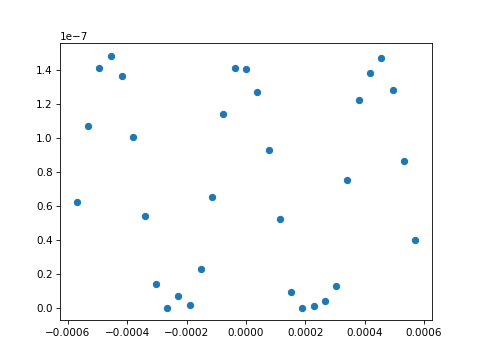

array([-5.70e-04, -5.32e-04, -4.94e-04, -4.56e-04, -4.18e-04, -3.80e-04,
       -3.42e-04, -3.04e-04, -2.66e-04, -2.28e-04, -1.90e-04, -1.52e-04,
       -1.14e-04, -7.60e-05, -3.80e-05,  0.00e+00,  3.80e-05,  7.60e-05,
        1.14e-04,  1.52e-04,  1.90e-04,  2.28e-04,  2.66e-04,  3.04e-04,
        3.42e-04,  3.80e-04,  4.18e-04,  4.56e-04,  4.94e-04,  5.32e-04,
        5.70e-04])

In [1420]:
v = 2

Blst = swpdf[swpdf.devid=='N5b'].iloc[v].swpdata.Bfield
runidlst = swpdf[swpdf.devid=='N5b'].iloc[v].swpdata.runid



from JJ_data_processing import xy_by_id,extract_Isw_R0_by_id

Isws = [extract_Isw_R0_by_id(rid, dy = 20e-6)[0] for rid in runidlst]


fig, ax = plt.subplots()
ax.plot(Blst, Isws, 'o')

Blst

<IPython.core.display.Javascript object>


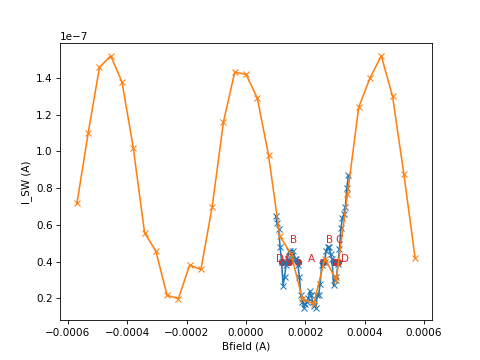

Text(0, 0.5, 'I_SW (A)')

In [1415]:
fig,ax = plt.subplots()

Blst = swpdf[swpdf.devid=='N5b'].iloc[3].swpdata.Bfield
Bl = []
for i in [4,9,15,32,39,42]:
    Bl += [Blst[i]]
for i in Bl:
    ax.plot(i,0.4e-7,marker = 'o', color = 'C3')

lslst = ['-','-']
for i,v in enumerate([3,2]):
    Blst = swpdf[swpdf.devid=='N5b'].iloc[v].swpdata.Bfield
    runidlst = swpdf[swpdf.devid=='N5b'].iloc[v].swpdata.runid

    I_SWlst  = []
    for r in range(len(runidlst)):
        IVdfjump = jump_by_id(runidlst[r], V_thres=50e-6)
        if IVdfjump.shape[0]==4:
            I_SWlst += [(IVdfjump.iloc[0].I-IVdfjump.iloc[2].I)/2]
        else:
            I_SWlst += [np.abs(IVdfjump.I).max()]

    ax.plot(Blst,I_SWlst,ls=lslst[i],marker='x')
ax.annotate('D',(0.00010,4e-8),color = 'C3')
ax.annotate('C',(0.00013,4e-8),color = 'C3')
ax.annotate('B',(0.00015,5e-8),color = 'C3')
ax.annotate('A',(0.00021,4e-8),color = 'C3')
ax.annotate('B',(0.00027,5e-8),color = 'C3')
ax.annotate('C',(0.00030,5e-8),color = 'C3')
ax.annotate('D',(0.00032,4e-8),color = 'C3')
ax.set_xlabel('Bfield (A)')
ax.set_ylabel('I_SW (A)')

<IPython.core.display.Javascript object>


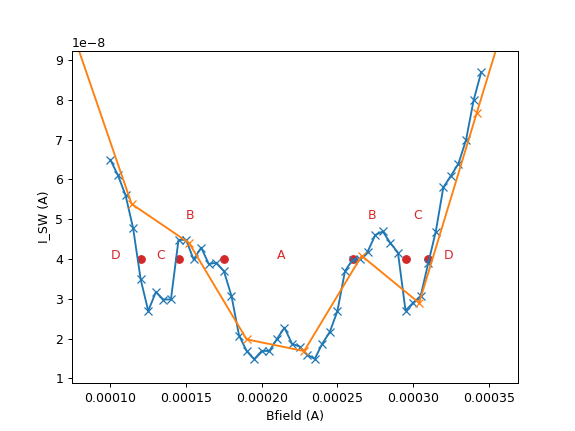

Text(0, 0.5, 'I_SW (A)')

In [1390]:
fig,ax = plt.subplots()

Blst = swpdf[swpdf.devid=='N5b'].iloc[3].swpdata.Bfield
Bl = []
for i in [4,9,15,32,39,42]:
    Bl += [Blst[i]]
for i in Bl:
    ax.plot(i,0.4e-7,marker = 'o', color = 'C3')

lslst = ['-','-']
for i,v in enumerate([3,2]):
    Blst = swpdf[swpdf.devid=='N5b'].iloc[v].swpdata.Bfield
    runidlst = swpdf[swpdf.devid=='N5b'].iloc[v].swpdata.runid

    I_SWlst  = []
    for r in range(len(runidlst)):
        IVdfjump = jump_by_id(runidlst[r], V_thres=200e-6)
        if IVdfjump.shape[0]==4:
            I_SWlst += [(IVdfjump.iloc[0].I-IVdfjump.iloc[2].I)/2]
        else:
            I_SWlst += [np.abs(IVdfjump.I).max()]

    ax.plot(Blst,I_SWlst,ls=lslst[i],marker='x')
ax.annotate('D',(0.00010,4e-8),color = 'C3')
ax.annotate('C',(0.00013,4e-8),color = 'C3')
ax.annotate('B',(0.00015,5e-8),color = 'C3')
ax.annotate('A',(0.00021,4e-8),color = 'C3')
ax.annotate('B',(0.00027,5e-8),color = 'C3')
ax.annotate('C',(0.00030,5e-8),color = 'C3')
ax.annotate('D',(0.00032,4e-8),color = 'C3')
ax.set_xlabel('Bfield (A)')
ax.set_ylabel('I_SW (A)')

> WS: Now, remember we mentioned that we will be seeing more similarities in dataset B and D? So here I marked out the range of dataset in the graph of I_SW(B). One common point of dataset B and D is that they all have I_SW greater than ~ 40 nA, while C and A has I_SW < 40 nA. Please be reminded that except dataset D all of the I_SW isn't really just switch from V=0 to V=V_gap but V_subgap to V_gap, so the I_SW in C-B-A-B-C segment of blue curve above is related to V_subgap and we saw an extra jump even in gap state around 100nA in C and A as well.

WS: Add more data points at -1xFF and ZF

In [1192]:
# dic = {'b':282}
# for i in dic:
#     nstart = dic[i]
#     devid = 'N5'+i
#     Blst = np.arange(100e-6,350e-6,5e-6)-380e-6

#     sweep = {'runid' : np.arange(nstart,nstart+len(Blst),1),
#              'Bfield': Blst,
#              'T': [63e-3]*len(Blst)}
#     swpdt = pd.Series(data = sweep)

#     swpd0 = {'devid'  : devid,
#              'swpdata': [swpdt],
#              'desc'   : 'B periodicity_near -FF'}
#     swpd0 = pd.DataFrame(data = swpd0)
#     swpdf = swpdf.append(swpd0)

In [1331]:
# dic = {'b':383}
# for i in dic:
#     nstart = dic[i]
#     devid = 'N5'+i
#     Blst = np.arange(100e-6,350e-6,5e-6)-190e-6

#     sweep = {'runid' : np.arange(nstart,nstart+len(Blst),1),
#              'Bfield': Blst,
#              'T': [63e-3]*len(Blst)}
#     swpdt = pd.Series(data = sweep)

#     swpd0 = {'devid'  : devid,
#              'swpdata': [swpdt],
#              'desc'   : 'B periodicity_near ZF'}
#     swpd0 = pd.DataFrame(data = swpd0)
#     swpdf = swpdf.append(swpd0)

## R0 near FF

In [1408]:
swpdf

devid                                            swpdata  \
0   N5full  runid                              [18, 19, 20...   
1   N5full  runid                              [25, 26, 27...   
2   N5full  runid              [31, 32, 33, 34, 35, 36, 37...   
3   N5full  runid                   [44, 45, 46]
Bfield   ...   
4      N5a  runid                   [47, 48, 49]
Bfield   ...   
5      N5b  runid                   [50, 51, 52]
Bfield   ...   
6      N5c  runid                   [53, 54, 55]
Bfield   ...   
7      N5d  runid                   [56, 57, 58]
Bfield   ...   
8      N5e  runid                   [59, 60, 61]
Bfield   ...   
9      N5f  runid                   [62, 63, 64]
Bfield   ...   
10     N5g  runid                   [65, 66, 67]
Bfield   ...   
11     N5g  runid                  [68, 69, 70, 71, 72, 73...   
12     N5f  runid                  [77, 78, 79, 80, 81, 82...   
13     N5e  runid                  [86, 87, 88, 89, 90, 91...   
14     N5d  runid         [117, 118, 119, 120, 121, 122, 1...   
15     N5c  runid         [126, 127, 128, 129, 130, 131, 1...   
16     N5b  runid         [135, 136, 137, 138, 139, 140, 1...   
17     N5a  runid         [144, 145, 146, 147, 148, 149, 1...   
18     N5b  runid     [174, 175, 176, 177, 178, 179, 180, ...   
19     N5b  runid     [205, 206, 207, 208, 209, 210, 211, ...   
20     N5b  runid     [255, 256, 257, 258, 259, 260, 261, ...   
21     N5b  runid     [282, 283, 284, 285, 286, 287, 288, ...   
22     N5b  runid     [383, 384, 385, 386, 387, 388, 389, ...   

                             desc  
0             sanity check, B dep  
1   sanity check, search FF rough  
2    sanity check, search FF fine  
3                  init check_old  
4                  init check_old  
5                  init check_old  
6                  init check_old  
7                  init check_old  
8                  init check_old  
9                  init check_old  
10                 init check_old  
11                  FF detail_old  
12                  FF detail_old  
13                  FF detail_old  
14                  FF detail_old  
15                  FF detail_old  
16                  FF detail_old  
17                  FF detail_old  
18            B periodicity_rough  
19          B periodicity_near FF  
20                   B stochastic  
21         B periodicity_near -FF  
22          B periodicity_near ZF

<IPython.core.display.Javascript object>


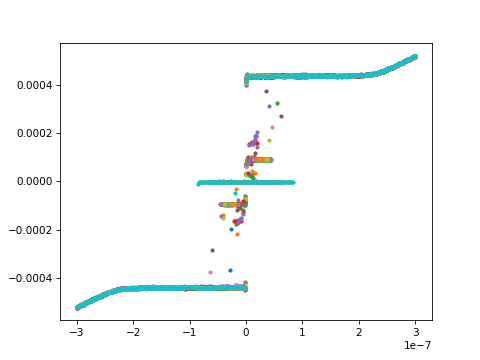

In [1407]:
f,ax=plt.subplots()
for i in swpdf.iloc[19].swpdata.runid:
    ax.plot(shIV_by_id(i).I,shIV_by_id(i).V, marker = '.', ls = '')

<IPython.core.display.Javascript object>


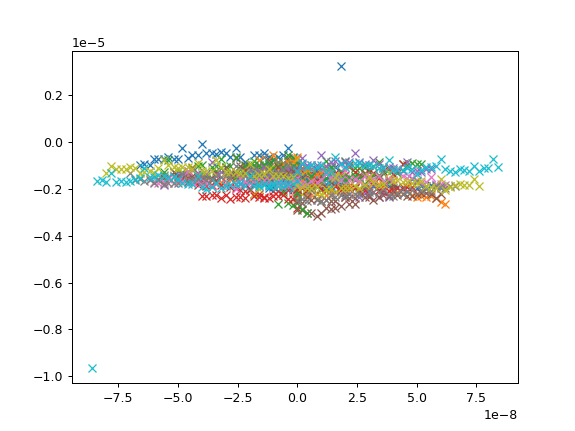

In [1365]:
fig,ax=plt.subplots()
# jj.pbi(swpdf.iloc[-4].swpdata.runid[0],ls='-',marker='x',axes=ax)
for i in swpdf.iloc[-4].swpdata.runid:
    IVdf = shIV_by_id(i)
    ax.plot(IVdf[np.abs(IVdf.V)<=10e-6].I,IVdf[np.abs(IVdf.V)<=10e-6].V,ls='none',marker='x')-

<IPython.core.display.Javascript object>


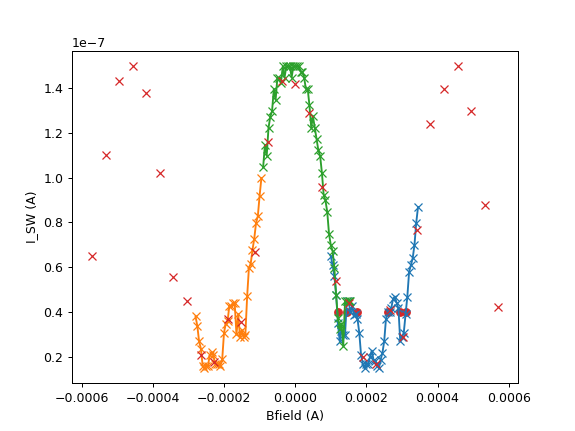

Text(0, 0.5, 'I_SW (A)')

In [1405]:
fig,ax = plt.subplots()

Blst = swpdf[swpdf.devid=='N5b'].iloc[3].swpdata.Bfield
Bl = []
for i in [4,9,15,32,39,42]:
    Bl += [Blst[i]]
for i in Bl:
    ax.plot(i,0.4e-7,marker = 'o', color = 'C3')

lslst = ['-','-','-','none']
for i,v in enumerate([3,5,6,2]):
    Blst = swpdf[swpdf.devid=='N5b'].iloc[v].swpdata.Bfield
    runidlst = swpdf[swpdf.devid=='N5b'].iloc[v].swpdata.runid

    I_SWlst  = []
    for r in range(len(runidlst)):
        IVdfjump = jump_by_id(runidlst[r], V_thres=200e-6)
        if IVdfjump.shape[0]==4:
            I_SWlst += [(IVdfjump.iloc[0].I-IVdfjump.iloc[2].I)/2]
        else:
            I_SWlst += [np.abs(IVdfjump.I).max()]

    ax.plot(Blst,I_SWlst,ls=lslst[i],marker='x')
ax.set_xlabel('Bfield (A)')
ax.set_ylabel('I_SW (A)')

In [1464]:
swpdf

devid                                            swpdata  \
0   N5full  runid                              [18, 19, 20...   
1   N5full  runid                              [25, 26, 27...   
2   N5full  runid              [31, 32, 33, 34, 35, 36, 37...   
3   N5full  runid                   [44, 45, 46]
Bfield   ...   
4      N5a  runid                   [47, 48, 49]
Bfield   ...   
5      N5b  runid                   [50, 51, 52]
Bfield   ...   
6      N5c  runid                   [53, 54, 55]
Bfield   ...   
7      N5d  runid                   [56, 57, 58]
Bfield   ...   
8      N5e  runid                   [59, 60, 61]
Bfield   ...   
9      N5f  runid                   [62, 63, 64]
Bfield   ...   
10     N5g  runid                   [65, 66, 67]
Bfield   ...   
11     N5g  runid                  [68, 69, 70, 71, 72, 73...   
12     N5f  runid                  [77, 78, 79, 80, 81, 82...   
13     N5e  runid                  [86, 87, 88, 89, 90, 91...   
14     N5d  runid         [117, 118, 119, 120, 121, 122, 1...   
15     N5c  runid         [126, 127, 128, 129, 130, 131, 1...   
16     N5b  runid         [135, 136, 137, 138, 139, 140, 1...   
17     N5a  runid         [144, 145, 146, 147, 148, 149, 1...   
18     N5b  runid     [174, 175, 176, 177, 178, 179, 180, ...   
19     N5b  runid     [205, 206, 207, 208, 209, 210, 211, ...   
20     N5b  runid     [255, 256, 257, 258, 259, 260, 261, ...   
21     N5b  runid     [282, 283, 284, 285, 286, 287, 288, ...   
22     N5b  runid     [383, 384, 385, 386, 387, 388, 389, ...   

                             desc  
0             sanity check, B dep  
1   sanity check, search FF rough  
2    sanity check, search FF fine  
3                  init check_old  
4                  init check_old  
5                  init check_old  
6                  init check_old  
7                  init check_old  
8                  init check_old  
9                  init check_old  
10                 init check_old  
11                  FF detail_old  
12                  FF detail_old  
13                  FF detail_old  
14                  FF detail_old  
15                  FF detail_old  
16                  FF detail_old  
17                  FF detail_old  
18            B periodicity_rough  
19          B periodicity_near FF  
20                   B stochastic  
21         B periodicity_near -FF  
22          B periodicity_near ZF

In [1465]:
swpdf[swpdf.devid=='N5b']

devid                                            swpdata  \
5    N5b  runid                   [50, 51, 52]
Bfield   ...   
16   N5b  runid         [135, 136, 137, 138, 139, 140, 1...   
18   N5b  runid     [174, 175, 176, 177, 178, 179, 180, ...   
19   N5b  runid     [205, 206, 207, 208, 209, 210, 211, ...   
20   N5b  runid     [255, 256, 257, 258, 259, 260, 261, ...   
21   N5b  runid     [282, 283, 284, 285, 286, 287, 288, ...   
22   N5b  runid     [383, 384, 385, 386, 387, 388, 389, ...   

                      desc  
5           init check_old  
16           FF detail_old  
18     B periodicity_rough  
19   B periodicity_near FF  
20            B stochastic  
21  B periodicity_near -FF  
22   B periodicity_near ZF

## Stochastic check

In [1232]:
# dic = {'b':255}
# for i in dic:
#     nstart = dic[i]
#     devid = 'N5'+i
#     Blst = [0]*26

#     sweep = {'runid' : np.arange(nstart,nstart+len(Blst),1),
#              'Bfield': Blst,
#              'T': [63e-3]*len(Blst)}
#     swpdt = pd.Series(data = sweep)

#     swpd0 = {'devid'  : devid,
#              'swpdata': [swpdt],
#              'desc'   : 'B Stochastic'}
#     swpd0 = pd.DataFrame(data = swpd0)
#     swpdf = swpdf.append(swpd0)

<IPython.core.display.Javascript object>


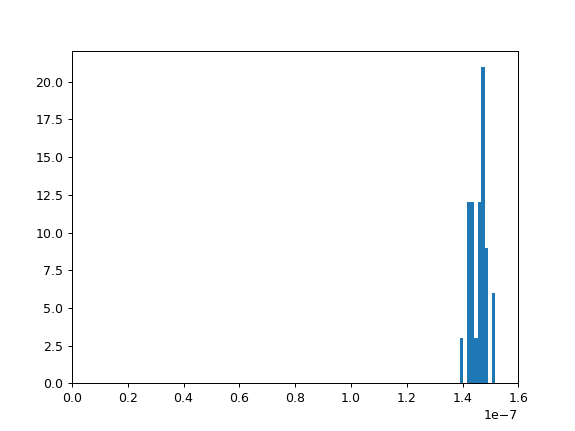

(0.0, 1.6e-07)

In [1387]:
fig,ax = plt.subplots()

dflst = []
for i in swpdf.iloc[20].swpdata.runid:
    df = jump_by_id(i)
    if df.I.shape[0]==4:
        lst += [(df.I.iloc[0]-df.I.iloc[2])/2]
    else:
        lst += [np.abs(df.I.sum())]
ax.hist(lst)
ax.set_xlim(0,1.6e-7)

In [ ]:
WS: So, questions:

A. Can we interpretate the further drop in I_SW(B) as some field-sensitive process?
B. Can I_SW for dataset B and D be corresponding to the assymetry of our SQUID? (EJ_min)


WS: It seems that we have some fine features around FF (tbh it's probably worth checking the ZF as well.) Let's think about how to extract some information to help investigating the origin of subgap state.

1. Is this feature has higher frequency in terms of B? Anything in the design 6 times larger than the SQUID loop?
2. 

In [698]:
dic = {'full':,'g':,'f':,'e':,'d':,'c':,'b':174,'a':}
for i in dic:
    nstart = dic[i]
    devid = 'N5'+i
    Blst = np.linspace(1.7,2.1,9)*1e-4

    sweep = {'runid' : np.arange(nstart,nstart+len(Blst),1),
             'Bfield': Blst,
             'T': [63e-3]*len(Blst)}
    swpdt = pd.Series(data = sweep)

    swpd0 = {'devid'  : devid,
             'swpdata': [swpdt],
             'desc'   : 'FF detail'}
    swpd0 = pd.DataFrame(data = swpd0)
    swpdf = swpdf.append(swpd0)

## Fine scan near FF

<IPython.core.display.Javascript object>


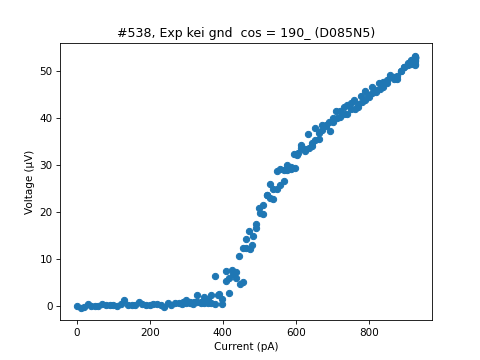

In [1448]:
jj.pbi(538, interactive = True)

cos = 0.1

<IPython.core.display.Javascript object>


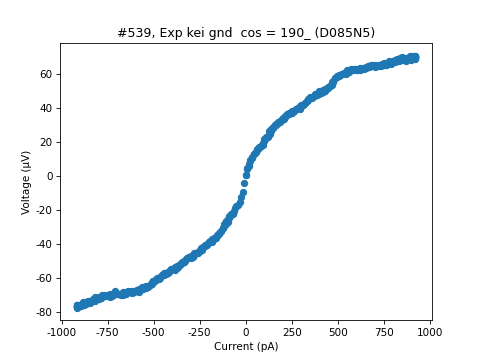

In [1437]:
jj.pbi(539, interactive = True)



B = 0.140

In [1455]:
jj.ZF = -10e-6
jj.FF = 215e-6

jj.B_to_cos(140e-6)

0.5000000000000001

<IPython.core.display.Javascript object>


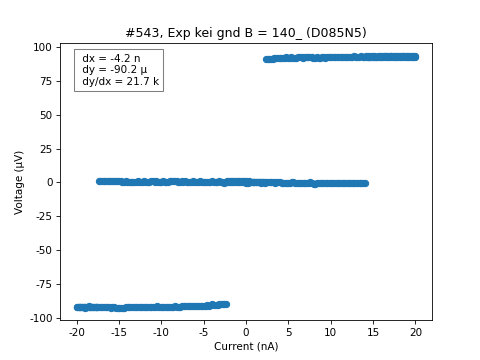

In [1453]:
jj.pbi(543, interactive = True)

<IPython.core.display.Javascript object>


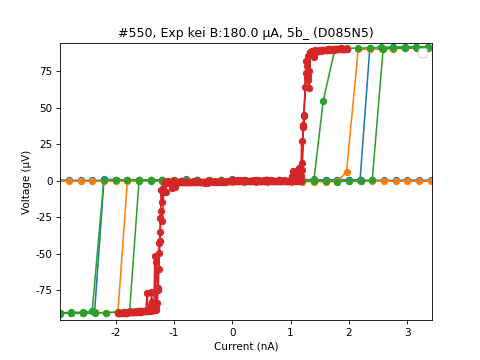

No handles with labels found to put in legend.


In [1463]:
jj.bpbi([544,545,546,550],ls='-')

In [1468]:
jj.mock_meas((runid_P, runidlst), (Bfield_tool, Blist))

devid                                            swpdata  \
0   N5full  runid                              [18, 19, 20...   
1   N5full  runid                              [25, 26, 27...   
2   N5full  runid              [31, 32, 33, 34, 35, 36, 37...   
3   N5full  runid                   [44, 45, 46]
Bfield   ...   
4      N5a  runid                   [47, 48, 49]
Bfield   ...   
5      N5b  runid                   [50, 51, 52]
Bfield   ...   
6      N5c  runid                   [53, 54, 55]
Bfield   ...   
7      N5d  runid                   [56, 57, 58]
Bfield   ...   
8      N5e  runid                   [59, 60, 61]
Bfield   ...   
9      N5f  runid                   [62, 63, 64]
Bfield   ...   
10     N5g  runid                   [65, 66, 67]
Bfield   ...   
11     N5g  runid                  [68, 69, 70, 71, 72, 73...   
12     N5f  runid                  [77, 78, 79, 80, 81, 82...   
13     N5e  runid                  [86, 87, 88, 89, 90, 91...   
14     N5d  runid         [117, 118, 119, 120, 121, 122, 1...   
15     N5c  runid         [126, 127, 128, 129, 130, 131, 1...   
16     N5b  runid         [135, 136, 137, 138, 139, 140, 1...   
17     N5a  runid         [144, 145, 146, 147, 148, 149, 1...   
18     N5b  runid     [174, 175, 176, 177, 178, 179, 180, ...   
19     N5b  runid     [205, 206, 207, 208, 209, 210, 211, ...   
20     N5b  runid     [255, 256, 257, 258, 259, 260, 261, ...   
21     N5b  runid     [282, 283, 284, 285, 286, 287, 288, ...   
22     N5b  runid     [383, 384, 385, 386, 387, 388, 389, ...   

                             desc  
0             sanity check, B dep  
1   sanity check, search FF rough  
2    sanity check, search FF fine  
3                  init check_old  
4                  init check_old  
5                  init check_old  
6                  init check_old  
7                  init check_old  
8                  init check_old  
9                  init check_old  
10                 init check_old  
11                  FF detail_old  
12                  FF detail_old  
13                  FF detail_old  
14                  FF detail_old  
15                  FF detail_old  
16                  FF detail_old  
17                  FF detail_old  
18            B periodicity_rough  
19          B periodicity_near FF  
20                   B stochastic  
21         B periodicity_near -FF  
22          B periodicity_near ZF

In [1499]:
Blst = np.linspace(150,180,4)*1e-6
Blst

array([0.00015, 0.00016, 0.00017, 0.00018])

<IPython.core.display.Javascript object>


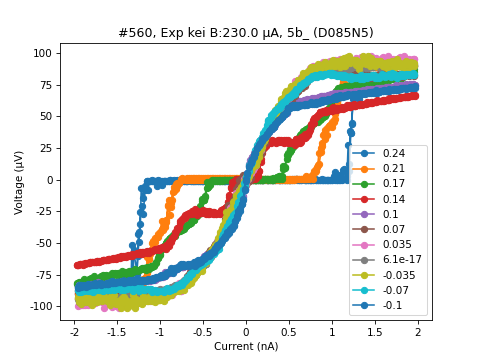

In [1514]:
Blst = np.linspace(180,230,11)*1e-6
cos_labs = ['{:.2}'.format(jj.B_to_cos(B)) for B in Blst]
B_labs   = ['{:2.0f}'.format(B*1e6) for B in Blst]
runidlst = range(550, 560+1)

jj.bpbi(runidlst,ls='-', labels = cos_labs)

closer look at cos = .14 to extract R0 

<IPython.core.display.Javascript object>


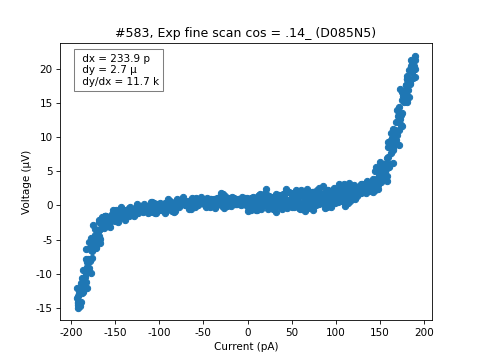

In [1523]:
jj.pbi(583, interactive = True)

looking for a minimal cos value whih is still worth to meas. 0.12?

<IPython.core.display.Javascript object>


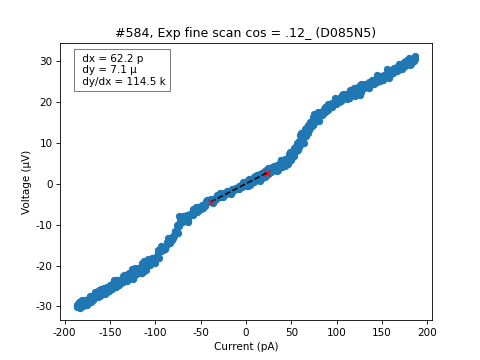

In [1530]:
jj.pbi(584, interactive = True)

ok, .12 sounds good

what about upper limit?

<IPython.core.display.Javascript object>


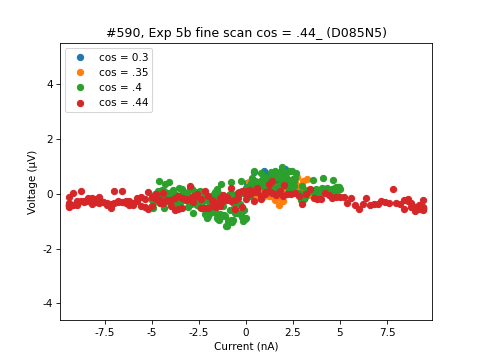

In [1542]:
jj.bpbi([585, 586, 587, 590], 
        labels = ['cos = 0.3', 'cos = .35', 'cos = .4', 'cos = .44'])

## fine Isw(B)

measure different B range with diff stepsize

near FF

<IPython.core.display.Javascript object>


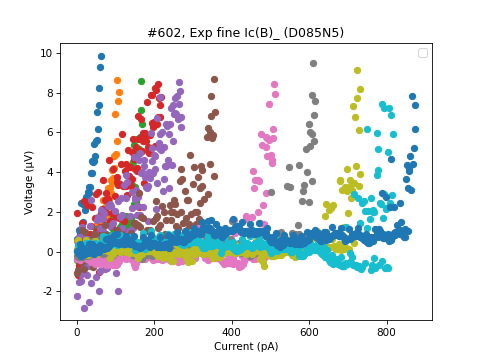

No handles with labels found to put in legend.


In [1551]:
jj.bpbi(range(592, 602+1))

mid frust

<IPython.core.display.Javascript object>


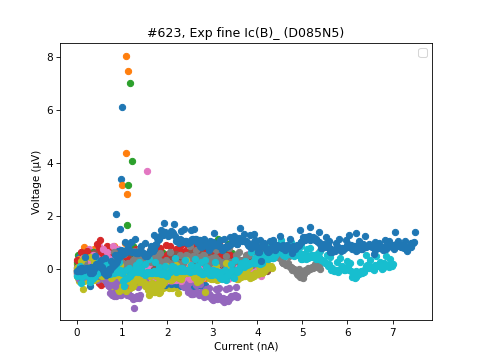

No handles with labels found to put in legend.


In [1552]:
jj.bpbi(range(603, 623+1))

near ZF

<IPython.core.display.Javascript object>


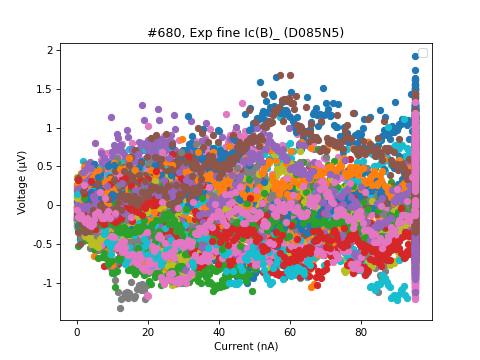

No handles with labels found to put in legend.


In [1553]:
jj.bpbi(range(624, 680+1))

wrong kei limit, remeas

..\..\_jjtools\JJ_data_processing.py:287: RuntimeWarning: invalid value encountered in less
  ind1 = np.where(np.abs(vA0) < dx )
..\..\_jjtools\JJ_data_processing.py:499: RankWarning: Polyfit may be poorly conditioned
  R0, b = np.polyfit (  Is[n_sl] , Vs[n_sl], 1 )
..\..\_jjtools\JJ_data_processing.py:499: RankWarning: Polyfit may be poorly conditioned
  R0, b = np.polyfit (  Is[n_sl] , Vs[n_sl], 1 )
..\..\_jjtools\JJ_data_processing.py:499: RankWarning: Polyfit may be poorly conditioned
  R0, b = np.polyfit (  Is[n_sl] , Vs[n_sl], 1 )
..\..\_jjtools\JJ_data_processing.py:499: RankWarning: Polyfit may be poorly conditioned
  R0, b = np.polyfit (  Is[n_sl] , Vs[n_sl], 1 )
..\..\_jjtools\JJ_data_processing.py:499: RankWarning: Polyfit may be poorly conditioned
  R0, b = np.polyfit (  Is[n_sl] , Vs[n_sl], 1 )
..\..\_jjtools\JJ_data_processing.py:499: RankWarning: Polyfit may be poorly conditioned
  R0, b = np.polyfit (  Is[n_sl] , Vs[n_sl], 1 )
..\..\_jjtools\JJ_data_processing.py:499: R

<IPython.core.display.Javascript object>


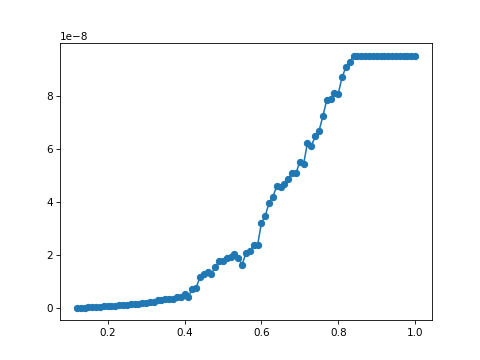

In [1558]:
ids = range(592, 680+1)
cos_list = np.arange(0.12, 1.01, 0.01)

Ics = [2*extract_Isw_R0_by_id (idx, dy = 100e-6)[0] for idx in ids]


fig, ax = plt.subplots()
ax.plot(cos_list, Ics, 'o-')
# ax.plot(B_list, Ics, 'o-')


# jj.mock_meas((jj.tools['I'], Ics), (jj.tools['B'], B_list),
#              label = 'partial Bscan')

compare with old guy with similar params

closer to FF we dont see anything useful, just S-shaped curves (mb we saw it before, e.g in B55??) 

<IPython.core.display.Javascript object>


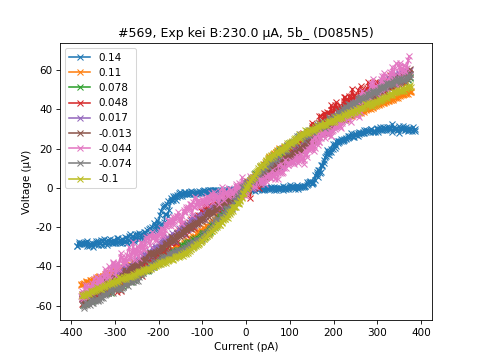

In [1506]:
Blst = np.linspace(195,230,9)*1e-6
cos_labs = ['{:.2}'.format(jj.B_to_cos(B)) for B in Blst]
B_labs   = ['{:2.0f}'.format(B*1e6) for B in Blst]
runidlst = range(561,569+1)

jj.bpbi(runidlst,ls='-', labels = cos_labs, marker='x')

## FIne scan ZF 5b



Let's measure just fine IVC for 5b to be able to compare with full chain Isw later on 

<IPython.core.display.Javascript object>


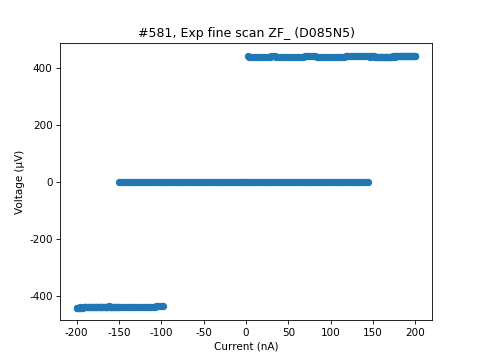

In [1512]:
jj.pbi(581)

<IPython.core.display.Javascript object>


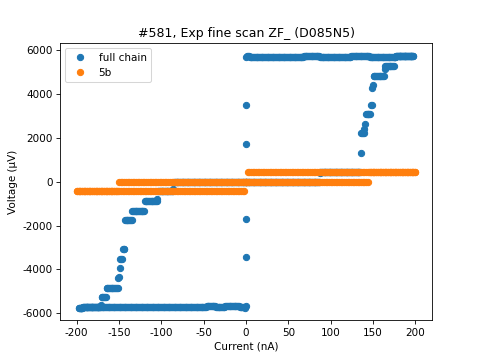

In [1513]:
jj.bpbi([3, 581],  labels = ['full chain', '5b'])

# Temp notes

Questions regarding toolbox:
1. What will be the system we use for tracking the meas parameter table (runid table)?
2. Are we primarly using IVC_udu? Any wrap around on Bscan and Tscan?
3. plotting/data extraction features? pbi, bpbi, IcR0 extraction, anything else?
4. Add time cost feature to IVC_udu

In [ ]:
# voltage leads:
# 3a                   3b

# current leads:
# 6b 6a 1a 5b 1b 4b 2a 2b
#   5  1  1  1  1  1  4   (number of SQUIDs in bewteen adjacent leads)
#   a  b  c  d  e  f  g   (dev label followed from Plamen's convention)

WS: to Kostya or whoever will take over the measurement,
I won't be able to be in the lab during the daytime of 8/31 Mon, but I will be doing remote work if I found no one using it on Monday.

Here is my briefing:
A. Finished sanity check on device N5. Switching current is about 200nA.
Bfield periodicity : FF = 190uA
Stochastic: wait analysis 
B. Single junction distribution check: wait re-do scans on all samples and align ISW

Below is the system status:
DUT shunt : disabled (connecting to DUT)
DUT pin   : N5b, I+-V+- = 6a1a,3ab
DUT heater: 0% @3.16mA, setpt = 20mK
Bfield rng: smua 2e-3A, smub 2e-3A
I_src rng : 0.2e-3A

In [ ]:
# fig,ax = plt.subplots()

# Blst = swpdf[swpdf.devid=='N5b'].iloc[1].swpdata.Bfield
# runidlst = swpdf[swpdf.devid=='N5b'].iloc[1].swpdata.runid

# Vavglst = []
# VgapPlst = []
# VgapNlst = []
# for i in range(len(runidlst)):
#     I, V = xy_by_id(runidlst[i])
#     Vavg = (V[len(V)//4]+V[len(V)//4*3])/2
#     Vavglst += [Vavg]
#     VgapPlst += [V[len(V)//4] - Vavg]
    
# ax.plot(Blst, Vavglst, ls='none', marker='x')
# ax.plot(Blst, VgapPlst, ls='none', marker='x')

# fig,ax = plt.subplots(1,2,figsize=(10,4))
# for i in runidlst:
#     if i !=138:
#         I, V = xy_by_id(i)
# #         Vavg = (V[len(V)//4]+V[3*len(V)//4])/2
#         ax[0].plot(I,V-V[0],ls='-',marker='x')
#         ax[1].plot(I,V-V[len(V)//4],ls='-',marker='x')
        
        
        
# ############################
# fig,ax = plt.subplots()

# Blst = swpdf[swpdf.devid=='N5b'].iloc[1].swpdata.Bfield
# runidlst = swpdf[swpdf.devid=='N5b'].iloc[1].swpdata.runid

# x =4
# I,V = xy_by_id(runidlst[x])
# Vavg = (V[len(V)//4]+V[len(V)//4*3])/2
# IVdf = pd.DataFrame(data = {'I':I, 'V':V-Vavg})
# ax.plot(I,V-Vavg,marker='o',ls='-')

# # IVdfjump = IVdf[np.abs(IVdf.diff().V) < 200e-6]
# # IVdfjump = IVdfjump[np.abs(IVdfjump.diff().V) >= 50e-6]
# IVdfjump = IVdf[np.abs(IVdf.diff().V) > 20e-6]
# print(IVdfjump)
# # IVdfjump = IVdfjump[np.abs(IVdfjump.diff().V) < 200e-6]
# ax.plot(IVdfjump.I,IVdfjump.V,marker='x',ls='none')

# Attempts solving the deep data selection issue

WS: In this file I tried to batched up runids for each measurment (sweeeping Bfield to find FF is one measurment, for example) into a pd.DataFrame called 'swpdf', and information withing each measurment are stored in this swpdf as a pd.Series, 'swpdt'.

The main idea is since we do not necessary sweep the same things everytime (sometimes sweep T, sometimes sweep Bfield etc.), so let's package whatever we have in one pd.Series.

In [ ]:
for i in range(swpdf.shape[0]):
    print(swpdf.iloc[i].swpdata['Bfield'])
    
for i in range(swpdf.shape[0]):
    a = swpdf.iloc[i].swpdata
    lst = []
    for s in a.index.to_list():
        lst += [s, a[s]]

    dic = {lst[i]: lst[i + 1] for i in range(0, len(lst), 2)}    
    a = pd.DataFrame(data = dic)
    print(a[a['Bfield']==40e-6]['runid'])